# Aim
Check whether DECD param give consistent fidelities with Qutip Simulations

# Imports

In [1]:
import sys 
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')
#sys.path.append('C:\\_Lib\\python\\ECD_control')
#sys.path.append('C:\\_Lib\\python')

In [2]:
# for param file 
#%%
# note: timestamp can't use "/" character for h5 saving.
TIMESTAMP_FORMAT = "%Y-%m-%d %H:%M:%S"
END_OPT_STRING = "\n" + "=" * 60 + "\n"
import numpy as np
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # supress warnings
import h5py

# print(
#     "\nNeed tf version 2.3.0 or later. Using tensorflow version: "
#     + tf.__version__
#     + "\n"
# )
import ECD_control.ECD_optimization.tf_quantum as tfq
from ECD_control.ECD_optimization.visualization import VisualizationMixin
import qutip as qt
import datetime
import time

In [3]:
# for pulse file
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
from scipy.optimize import fmin



# Finding Param

In [4]:
%load_ext autoreload
%autoreload 2

In [21]:
from DECD_param import FixedBatchOptimizer as BO
from qutip import *

In [22]:
N1 = 5 
N2 = 5

In [23]:
#Initial oscillator state.
Fock1 = 0
Fock2= 1
psi_i1 = qt.basis(N1,Fock1) #initial state
psi_i2 = qt.basis(N2,Fock2)
initial1 = qt.tensor(basis(2,0), psi_i1, psi_i2)

#Target
Fock1 = 1
Fock2= 0
psi_t1 = qt.basis(N1,Fock1) #target state
psi_t2 = qt.basis(N2,Fock2)
target1 = qt.tensor(basis(2,0), psi_t1, psi_t2)
#-------------------------------------------------------
#Second state 
#Initial oscillator state.
Fock1 = 0
Fock2= 2
psi_i1 = qt.basis(N1,Fock1) #initial state
psi_i2 = qt.basis(N2,Fock2)
initial2 = qt.tensor(basis(2,0), psi_i1, psi_i2)


#Target
Fock1 = 2
Fock2= 0
psi_t1 = qt.basis(N1,Fock1) #target state
psi_t2 = qt.basis(N2,Fock2)
target2 = qt.tensor(basis(2,0), psi_t1, psi_t2)

#-------------------------FUll list
initial = [initial1, initial2]
target = [target1, target2]

In [24]:


#Optimization of ECD Circuit parameters (betas, gammas, phis, and thetas)
#the optimization options
opt_params = {
'N_blocks' : 10, #circuit depth
'N_multistart' : 20, #Batch size (number of circuit optimizations to run in parallel)
'epochs' : 100, #number of epochs before termination
'epoch_size' : 20, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.999, #terminal fidelitiy
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'gamma_scale' : 3.0, #maximum |gamma| for random initialization
'N_cav1': N1, #number of levels in mode 1
'N_cav2': N2, #number of levels in mode 2
'initial_states' : initial, #qubit tensor oscillator, start in |g> |0>
'target_states' : target, #end in |e> |target>.
#"initial_params": init_params,
'name' : 'Fock1 %d' % Fock1, #name for printing and saving
'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
}



In [25]:
opt = BO(**opt_params)
opt.print_info()

None
Fixed construct needed matrices called
None
Fixed construct needed matrices called
optimization_type: state transfer
N_multistart: 20
N_blocks: 10
term_fid: 0.999
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 20
epochs: 100
beta_scale: 3.0
gamma_scale: 3.0
alpha1_scale: 1.0
alpha2_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: Fock1 2
comment: 
initial_params: None
N_cav1: 5
N_cav2: 5
filename: Fock1 2.h5

Best circuit parameters found:
betas:         [-0.43816+0.00379j -0.7346 -0.60654j  1.19414+0.74248j -2.63064+0.17433j
  2.30086-1.32505j  2.18775-0.38512j  0.04184+0.06587j  0.28498-0.62175j
 -2.72517-1.22635j -1.09328+0.19953j]
gammas:         [-0.94468-1.41476j  1.84347-1.34567j -0.27971-0.03452j -0.78716+1.46457j
  0.0168 -0.11853j -0.02378+0.50042j -0.06763-0.55456j  1.14542-0.80536j
 -0.43487+0.4624j  -0.30438+0.75032j]
alphas1:        [0.+0.j]
alphas2:        [0.+0.j]
phis (deg):    [   0.     

In [26]:
opt.optimize()

Start time: 2022-08-22 08:35:24
 Epoch: 0 / 100 Max Fid: 0.021756 Avg Fid: 0.009117 Max dFid: 0.000000 Avg dFid: 0.000000 Elapsed time: 0:00:00.046866 Remaing time: 0:00:00Start time: 2022-08-22 08:35:24
 Epoch: 24 / 100 Max Fid: 0.861210 Avg Fid: 0.740808 Max dFid: 0.046542 Avg dFid: 0.003999 Elapsed time: 0:00:56.141309 Remaing time: 0:02:57.780811
 max dFid: 0.046542
dFid stop: 0.000001


 Optimization stopped on keyboard interrupt
optimization_type: state transfer
N_multistart: 20
N_blocks: 10
term_fid: 0.999
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 20
epochs: 100
beta_scale: 3.0
gamma_scale: 3.0
alpha1_scale: 1.0
alpha2_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: Fock1 2
comment: 
initial_params: None
N_cav1: 5
N_cav2: 5
filename: Fock1 2.h5

Best circuit parameters found:
betas:         [ 0.90773+0.06158j  0.04161+0.01892j -2.78112+0.57633j  2.50433+1.31924j
  1.69314+1.53469j  0.23334+1.66914j

'2022-08-22 08:35:24'


 max dFid: 0.046542
dFid stop: 0.000001


 Optimization stopped on keyboard interrupt
optimization_type: state transfer
N_multistart: 20
N_blocks: 10
term_fid: 0.999
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 20
epochs: 100
beta_scale: 3.0
gamma_scale: 3.0
alpha1_scale: 1.0
alpha2_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: Fock1 2
comment: 
initial_params: None
N_cav1: 5
N_cav2: 5
filename: Fock1 2.h5

Best circuit parameters found:
betas:         [ 0.90773+0.06158j  0.04161+0.01892j -2.78112+0.57633j  2.50433+1.31924j
  1.69314+1.53469j  0.23334+1.66914j  0.47451+2.03532j  0.11736+0.08317j
  2.46395+1.05792j  0.64323-0.47488j]
gammas:         [-0.57914-0.96234j -2.33542+0.36718j -0.4695 -0.45501j -3.54135-0.48758j
  0.0035 +0.07664j  2.19858-1.40516j  2.04905-0.49958j -1.30382+2.46929j
 -0.17059+0.41217j  1.28963+1.26982j]
alphas1:        [0.+0.j]
alphas2:        [0.+0.j]
phis (deg):    [   0.      

'2022-08-22 08:35:24'

In [27]:
# saving angles 
betas = opt.best_circuit()['betas']
gammas = opt.best_circuit()['gammas']
phis = opt.best_circuit()['phis']
thetas = opt.best_circuit()['thetas']
etas = opt.best_circuit()['etas']
params = [np.real(betas), np.imag(betas), np.real(gammas), np.imag(gammas), phis, thetas, etas]
for i in range(len(params)):
    params[i] = [float(k) for k in params[i]]

fname = 'Test_01_10_May20.txt'
a_file = open(fname, "w")
np.savetxt(a_file, params)
a_file.close()

# Calculator

In [22]:
from qutip import *

In [28]:
def mod_disp_op(disp, n_q, n_c):
    '''
    Returns displacement operator using baken campbell formula
    '''
    pauli_like_x = (create(n_c) + destroy(n_c))
    pauli_like_y = (1j)*(create(n_c) - destroy(n_c))
    comm = (1/2)*((pauli_like_x*pauli_like_y) - (pauli_like_y*pauli_like_x))
    re = np.real(disp)
    im = np.imag(disp)

    first = (1j*im*pauli_like_x).expm()
    second = (-1j*re*pauli_like_y).expm()
    third = ((im*re)*(-1)*comm).expm()
    return first*second*third

def disp_op(disp, n_q, n_c):
    '''
    Returns displacement operator for specified displacement
    '''
    #disp = normalize_complex(disp)
    exponent = (disp*create(n_c))- (np.conjugate(disp)*destroy(n_c))
    return  exponent.expm()

def cond_disp_op(beta, n_q, n_c1, n_c2,mode, use_mod):
    '''
    Returns cond displacement operator for specified real displacement
    '''
    disp = beta/2
    
    n_c = n_c1 if mode == 1 else n_c2
    
    if use_mod: 
        d = mod_disp_op(disp= disp, n_q = n_q, n_c = n_c) #Baker Campbell Approx
    else: 
        d = disp_op(disp= disp, n_q = n_q, n_c = n_c)
    d_adjoint = d.dag()
    
    if mode == 1: 
        left = tensor(create(n_q), d, qeye(n_c2)) #D(beta/2)|e><g|
        right = tensor(destroy(n_q), d_adjoint, qeye(n_c2)) #D(-beta/2)|g><e|   ...not sure d_adjoint(alpha) = d(-alpha) if use Baker
    
    else: #mode ==2 
        left = tensor(create(n_q), qeye(n_c2), d)
        right = tensor(destroy(n_q),  qeye(n_c2), d_adjoint)
    return left+right

def qubit_rot(phi, theta, n_q, n_c1, n_c2):
    '''
    Returns qubit rotation
    '''
    rot = (np.cos(phi)*sigmax()) + (np.sin(phi)*sigmay())
    exp = (-1.0j)*(theta/2)*(rot)
    return tensor(exp.expm(), qeye(n_c1), qeye(n_c2) )

def normalize_complex(number):
    '''
    Returns radius r of complex number z = r*e^iphi
    '''
    return np.sqrt(number.real**2 + (number .imag**2))

def dot(state1, state2):
    '''
    dotting both states
    '''
    fid = state1.overlap(state2)
    return fid*np.conjugate(fid)

def evolve(initial_state, betas, gammas, phis, thetas, n_q, n_c1, n_c2, use_mod = False):
    '''
    Operates on initial_state with ECD(beta_n)*R(phi_n, theta_n) *...........*ECD(beta_1)*R(phi_1, theta_1)
    '''
    n = len(betas)
    state = initial_state
    for i in range(n):
        beta = betas[i]
        gamma = gammas[i]
        phi = phis[i]
        theta = thetas[i]
        
  
    
        #state = cond_disp_op(gamma, n_q, n_c1,n_c2,mode = 2,use_mod = use_mod)*cond_disp_op(beta, n_q, n_c1,n_c2, mode = 1,use_mod = use_mod)*qubit_rot(phi, theta, n_q, n_c1, n_c2)*state
        state = cond_disp_op(beta, n_q, n_c1,n_c2, mode = 1,use_mod = use_mod)*cond_disp_op(gamma, n_q, n_c1,n_c2,mode = 2,use_mod = use_mod)*qubit_rot(phi, theta, n_q, n_c1, n_c2)*state
           
    return state
        
        

In [24]:
# initial = tensor(basis(2, 0), basis(N1, 0), basis(N2, 1))
# target = tensor(basis(2, 0), basis(N1, 1), basis(N2, 0))
# pi_target = tensor(basis(2, 1), basis(N1, 1), basis(N2, 0))

In [35]:
rho_calc = evolve(initial[0],betas,gammas, phis, thetas,n_q = 2,n_c1 = N1, n_c2 = N2,
                   use_mod = True)
fid1 = dot(target[0], rho_calc)
fid1

(0.8761035465053048+0j)

(0.8761035465053048+0j)

In [36]:
rho_calc = evolve(initial[1],betas,gammas, phis, thetas,n_q = 2,n_c1 = N1, n_c2 = N2,
                   use_mod = True)
fid2 = dot(target[1], rho_calc)
fid2

(0.8467473051608212+0j)

(0.8467473051608212+0j)

In [37]:
np.mean([fid1, fid2])

(0.8614254258330629+0j)

(0.8614254258330629+0j)

In [38]:
opt.best_circuit()['fidelity']

0.8612673

0.8612673

In [27]:
# opt.batch_construct_block_operators(
#         opt.betas_rho, 
#     opt.betas_angle,opt.gammas_rho, opt.gammas_angle,
#         opt.alphas1_rho, opt.alphas1_angle, opt.alphas2_rho, opt.alphas2_angle,
#         opt.phis, opt.etas, opt.thetas)

In [28]:
# i= 0 
# beta = betas[i]
# gamma = gammas[i]
# phi = phis[i]
# theta = thetas[i]
# n_q = 2
# n_c1 = N1
# n_c2 = N2
# use_mod = True
  
# cond_disp_op(beta, n_q, n_c1,n_c2, mode = 1,use_mod = use_mod)*cond_disp_op(gamma, n_q, n_c1,n_c2,mode = 2,use_mod = use_mod)*qubit_rot(phi, theta, n_q, n_c1, n_c2)
           

# Pulse

In [39]:
from DECD_pulse import *

In [40]:
#Our cavity and qubit. When using pulse construction on the FPGA, these objects can be loaded, and 
#Here, we are making a "FakeCavity" and a "FakeQubit" with parameters found from experimental calibrations.

storage1_params = {
        "chi_kHz": -33, #dispersive shift
        "chi_prime_Hz": 0, #second order dispersive shift
        "Ks_Hz": 0, #Kerr correction not yet implemented.
        "epsilon_m_MHz": 400, #largest oscillator drive amplitude in MHz (max|epsilon|)
        "unit_amp": 0.01, #DAC unit amp of gaussian displacement to alpha=1.
        "sigma": 11, #oscillator displacement sigma
        "chop": 4, #oscillator displacement chop (number of stds. to include in gaussian pulse)
    }
storage2_params = {
        "chi_kHz": -33, #dispersive shift
        "chi_prime_Hz": 0, #second order dispersive shift
        "Ks_Hz": 0, #Kerr correction not yet implemented.
        "epsilon_m_MHz": 400, #largest oscillator drive amplitude in MHz (max|epsilon|)
        "unit_amp": 0.01, #DAC unit amp of gaussian displacement to alpha=1.
        "sigma": 11, #oscillator displacement sigma
        "chop": 4, #oscillator displacement chop (number of stds. to include in gaussian pulse)
    }
qubit_params = {'unit_amp': 0.5, 'sigma': 6, 'chop': 4} #parameters for qubit pi pulse.

#calculating conversion between qubit DAC units and MHz (Omega)
pi = rotate(np.pi, phi=0, sigma=qubit_params['sigma'], chop=qubit_params['chop'], dt=1)
Omega_m = np.real(np.max(pi))/qubit_params['unit_amp']

#creating the "Fake storage" and "Fake qubit"
storage1 = FakeStorage(**storage1_params)
storage2 = FakeStorage(**storage2_params)
qubit = FakeQubit(**qubit_params)

#The maximum displacement used during the ECD gates.
alpha_CD1 = 30
alpha_CD2 = 30
#Small delay to insert between oscillator and qubit pulses
buffer_time = 4

In [43]:
#From these calibrations, the storage and qubit objects calculate the
#conversion between DAC amplitude, and drive amplitude in MHz.
#so, [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz 
#and [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz.
#These parameters also represent the maximum drive amplitude,
#since the DAC max amplitude is 1 (assuming amplifiers don't saturate.)
print('Maximum oscillator 1 drive amplitude: |epsilon|/2*pi < %.3f MHz' % storage1.epsilon_m_MHz)
print('Maximum oscillator 2 drive amplitude: |epsilon|/2*pi < %.3f MHz' % storage2.epsilon_m_MHz)
print('Maximum qubit drive amplitude: |Omega|/2*pi < %.3f MHz' % qubit.Omega_m_MHz)


Maximum oscillator 1 drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum oscillator 2 drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum qubit drive amplitude: |Omega|/2*pi < 40.468 MHz
Maximum oscillator 1 drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum oscillator 2 drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum qubit drive amplitude: |Omega|/2*pi < 40.468 MHz


In [45]:
#generating the conditional displacement circuit.
#set 'chi_prime_correction = True' to correct for linear part of chi'
#final_disp = True will implement final ECD gate as a displacement
pulse_dict = conditional_displacement_circuit(betas, gammas, phis, thetas, storage1, storage2, qubit,
                     alpha_CD1, alpha_CD2 ,buffer_time=buffer_time, kerr_correction = False, chi_prime_correction=True, final_disp=True, pad=True)
cavity1_dac_pulse, cavity2_dac_pulse, qubit_dac_pulse, = pulse_dict['cavity1_dac_pulse'], pulse_dict['cavity2_dac_pulse'], pulse_dict['qubit_dac_pulse']



---------------------------------------------------
final displacement is 0.9098141789436348
---------------------------------------------------
final displacement is 0.9098141789436348
---------------------------------------------------
final displacement is 1.12316739559174
---------------------------------------------------
final displacement is 1.12316739559174
---------------------------------------------------
final displacement is 0.04571127456055908
---------------------------------------------------
final displacement is 0.04571127456055908
---------------------------------------------------
final displacement is 2.363727056833329
---------------------------------------------------
final displacement is 2.363727056833329
---------------------------------------------------
final displacement is 2.840209007263187
---------------------------------------------------
final displacement is 2.840209007263187
---------------------------------------------------
final displacement is 0.

In [46]:
cavity1_dac_pulse_GHz = (2*np.pi)*(10**(-3))*storage1.epsilon_m_MHz*cavity1_dac_pulse #convert from DAC to Mhz to Ghz
cavity2_dac_pulse_GHz = (2*np.pi)*(10**(-3))*storage2.epsilon_m_MHz*cavity2_dac_pulse #convert from DAC to Mhz to Ghz
qubit_dac_pulse_GHz = (2*np.pi)*10**(-3)*qubit.Omega_m_MHz*qubit_dac_pulse #convert from DAC to Mhz to Ghz

Text(0, 0.5, 'Ghz')

Text(0, 0.5, 'Ghz')

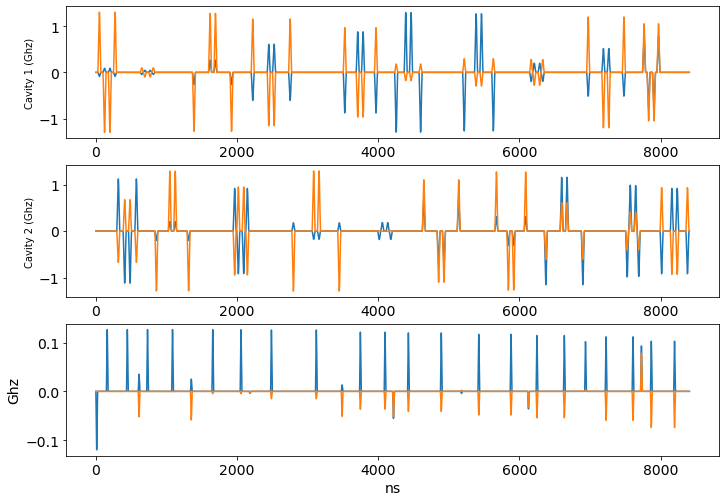

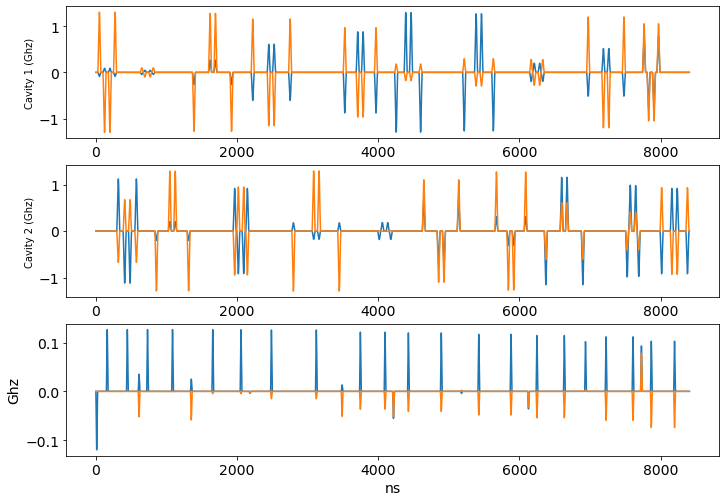

In [47]:
#plotting the pulse in GHz
fig, axs = plt.subplots(3,1)
axs[0].plot(np.real(cavity1_dac_pulse_GHz))
axs[0].plot(np.imag(cavity1_dac_pulse_GHz))
axs[1].plot(np.real(cavity2_dac_pulse_GHz))
axs[1].plot(np.imag(cavity2_dac_pulse_GHz))
axs[0].set_ylabel('Cavity 1 (Ghz)', fontsize = 10)
axs[1].set_ylabel('Cavity 2 (Ghz)', fontsize = 10)
axs[2].plot(np.real(qubit_dac_pulse_GHz))
axs[2].plot(np.imag(qubit_dac_pulse_GHz))
plt.xlabel('ns')
plt.ylabel('Ghz')

In [48]:
def alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array, delta=0, alpha_init=0 + 0j):
    dt = 1
    alpha_ = np.zeros_like(epsilon_array)
    alpha = np.array([complex(0,0) for i in range(len(alpha_))])
    alpha[0] = alpha_init
    alpha[1] = alpha_init
    for j in range(1, len(epsilon_array) - 1):
        alpha[j + 1] = (
                2*
                 dt
                * (
                    -1j * delta# * alpha[j]
                    #- 2j * Ks * np.abs(alpha[j]) ** 2 * alpha[j]
                    #- (kappa / 2.0) * alpha[j]
                    - 1j * epsilon_array[j]
                )
                + alpha[j - 1])
    return alpha

In [49]:
def alpha_star_from_epsilon_nonlinear_finite_difference(
    epsilon_array, delta=0, alpha_init=0 + 0j):
    dt = 1
    alpha_ = np.zeros_like(epsilon_array)
    alpha = np.array([complex(0,0) for i in range(len(alpha_))])
    alpha[0] = alpha_init
    alpha[1] = alpha_init
    for j in range(1, len(epsilon_array) - 1):
        alpha[j + 1] = (
                2*
                 dt
                * (
                    1j * delta# * alpha[j]
                    #- 2j * Ks * np.abs(alpha[j]) ** 2 * alpha[j]
                    #- (kappa / 2.0) * alpha[j]
                    + 1j * epsilon_array[j]
                )
                + alpha[j - 1])
    return alpha

In [50]:
alpha1 = alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array =cavity1_dac_pulse_GHz , delta=0, alpha_init=0 + 0j)
alpha1_star = alpha_star_from_epsilon_nonlinear_finite_difference(
    epsilon_array =np.conjugate(cavity1_dac_pulse_GHz) , delta=0, alpha_init=0 + 0j)

In [51]:
alpha2 = alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array =cavity2_dac_pulse_GHz , delta=0, alpha_init=0 + 0j)
alpha2_star = alpha_star_from_epsilon_nonlinear_finite_difference(
    epsilon_array =np.conjugate(cavity2_dac_pulse_GHz) , delta=0, alpha_init=0 + 0j)

Text(0, 0.5, 'alpha2')

Text(0, 0.5, 'alpha2')

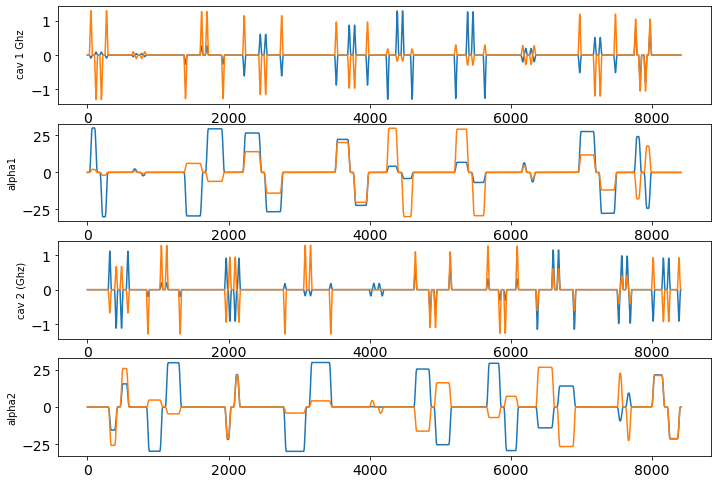

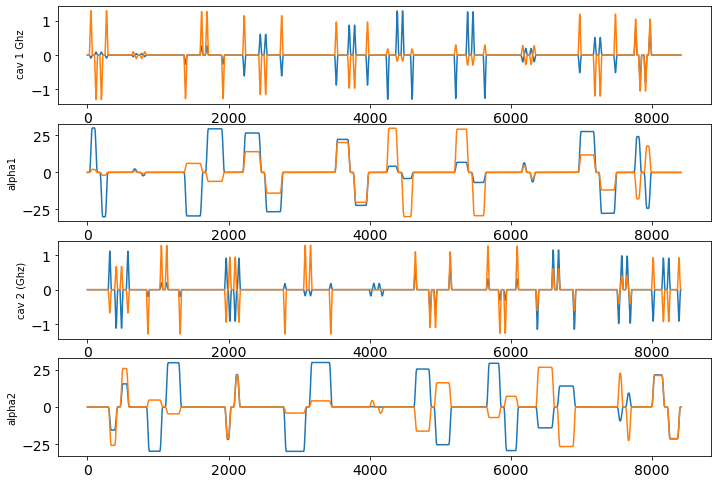

In [52]:
fig, axs = plt.subplots(4,1)
axs[0].plot(np.real(cavity1_dac_pulse_GHz))
axs[0].plot(np.imag(cavity1_dac_pulse_GHz))
axs[0].set_ylabel(' cav 1 Ghz', fontsize = 10)


axs[1].plot(np.real(alpha1))
axs[1].plot(np.imag(alpha1))
axs[1].set_ylabel('alpha1', fontsize = 10)

axs[2].plot(np.real(cavity2_dac_pulse_GHz))
axs[2].plot(np.imag(cavity2_dac_pulse_GHz))
axs[2].set_ylabel('cav 2 (Ghz)', fontsize = 10)

axs[3].plot(np.real(alpha2))
axs[3].plot(np.imag(alpha2))
axs[3].set_ylabel('alpha2', fontsize = 10)

# axs[2].plot(np.real(alpha1_star))
# axs[2].plot(np.imag(alpha1_star))
# axs[2].set_ylabel('alpha1_star', fontsize = 10)
# plt.xlabel('ns')



# axs[2].plot(np.real(alpha2_star))
# axs[2].plot(np.imag(alpha2_star))
# axs[2].set_ylabel('alpha2_star', fontsize = 10)
# plt.xlabel('ns')

# Qutip Simulation

In [53]:
from qutip import *
from qutip.control import *
from math import *

In [54]:
T = len(cavity1_dac_pulse)
times = np.linspace(0, T, T) #1ns timesteps

In [55]:
n_c1 = N1  #number of levels in cavity
n_c2 = N2  #number of levels in cavity
n_q = 2 #number of levels in qubit

#N = 1 #target cavity state

omega_c1  = 5.26 *2*pi   #frequencies in GHz
omega_c2 = 5.26 *2*pi   #frequencies in GHz
omega_q = 6.65*2*pi
#K = -3.7*(10**(-6))*2*pi #cavity nonlinearity

#photon depenedent number shifts
chi1 = storage1_params["chi_kHz"]*2*pi*(10**(-6)) #linear
chi1_ = storage1_params["chi_prime_Hz"]*(10**(-9)) #quadratic
chi2 = storage2_params["chi_kHz"]*2*pi*(10**(-6)) #linear
chi2_ = storage2_params["chi_prime_Hz"]*(10**(-9)) #quadratic

##mode to mode coupling 
eta = 0#10**(-6)

Assuming both modes have same number of levels

In [56]:
# Creating identity, annhilitation/creation, num operators 
identity_q = qeye(n_q)
identity_c = qeye(n_c1)

a_q = destroy(n_q)
a_c = destroy(n_c1)

adag_q = create(n_q)
adag_c = create(n_c2)

num_q = num(n_q)
num_c =  num(n_c1)


c_ops = []

tlist = times




In [57]:
# Displace Frame hammy
H0_disp = ((chi1/2)*tensor(sigmaz(), num_c, identity_c) # first mode -qubit
            +
          (chi2/2)*tensor(sigmaz(), identity_c, num_c) # 2nd mode - qubit
           +
          (eta)*tensor(identity_q, num_c, num_c)) # MODE-MODE

In [58]:
#for time dep hammy
def mult(a,b):
    '''
    Elementwise multiplication of two lists
    '''
    if len(a) != len(b):
        print('Error with mult: lists must be of same length')
        return []
    return [a[i]*b[i] for i in range(len(a)) ]
    

In [59]:
a = alpha2
b = alpha2_star

In [60]:
# prepping time depedent hammys
alpha1_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha1])
alpha2_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha2])
alpha1_times_2 = mult(alpha1, alpha2)
alpha1star_times_2 = mult(alpha1_star, alpha2)


H = [H0_disp,
     #Qubit drive
    [tensor(a_q, identity_c, identity_c), np.conjugate(qubit_dac_pulse_GHz)], 
     [tensor(adag_q, identity_c, identity_c), qubit_dac_pulse_GHz],
     
     # Desired Displacement term from qubit-mode1 coupling
     [(chi1/2)*tensor(sigmaz(), a_c, identity_c), alpha1_star],  
     [(chi1/2)*tensor(sigmaz(), adag_c, identity_c), alpha1],
     
     # Desired Displacement term from qubit-mode2 coupling
     [(chi2/2)*tensor(sigmaz(),  identity_c, a_c), b],  
     [(chi2/2)*tensor(sigmaz(), identity_c, adag_c), a],
     
     # UnDesired Displacement term from mode-mode coupling (no disp^2)
     
#      [(eta)*tensor(identity_q, a_c, num_c), alpha1_star],  
#      [(eta)*tensor(identity_q, adag_c, num_c), alpha1],
#      [(eta)*tensor(identity_q, num_c, a_c), alpha2_star],  
#      [(eta)*tensor(identity_q, num_c, adag_c), alpha2],
     
#      [(eta)*tensor(identity_q, a_c, a_c), np.conjugate(alpha1_times_2)],  
# #      [(eta)*tensor(identity_q, a_c, adag_c), alpha1star_times_2],
#      [(eta)*tensor(identity_q, adag_c, a_c), np.conjugate(alpha1star_times_2)],  
# #     [(eta)*tensor(identity_q, adag_c, adag_c), alpha1_times_2],
     
     # Undesired alpha^2 terms from frequency and mode-mode displacement
#       [(chi1/2)*tensor(sigmaz(), identity_c, identity_c), alpha1_sq],
#      [(chi2/2)*tensor(sigmaz(), identity_c, identity_c), alpha2_sq],
#      [(eta)*tensor(identity_q, identity_c, num_c), alpha1_sq],
#      [(eta)*tensor(identity_q, identity_c, num_c), alpha2_sq]
     ]

In [62]:
psi0 = initial[0]
opts = Options(store_states=True, store_final_state=True,nsteps = 40000,max_step = 1e-4)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
rho = output.states[-1]

KeyboardInterrupt: 

KeyboardInterrupt: 

In [ ]:
dot(rho, target[0])

In [ ]:
psi0 = initial[1]
opts = Options(store_states=True, store_final_state=True,nsteps = 40000,max_step = 1e-4)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
rho = output.states[-1]

In [ ]:
dot(rho, target[1])

In [52]:
# target_state = tensor(basis(n_q,1), basis(n_c1, 1), basis(n_c2, 0))
# fidelity = rho.overlap(target_state)
# fid = np.sqrt(fidelity.real**2 + fidelity.imag**2)
# print('Fidelity is '+ str(fid))

In [53]:
# target_state = tensor(basis(n_q,0), basis(n_c1, 1), basis(n_c2, 0))
# fidelity = rho.overlap(target_state)
# fid = np.sqrt(fidelity.real**2 + fidelity.imag**2)
# print('Fidelity is '+ str(fid))

In [54]:
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

In [55]:
def plot_populations(output, figname):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig = plt.figure(figsize=(10,8))
    probs = []
    times = [k for k in range(len(output.states))]
    max_num_levels = 2 # to be shown on the plot
    
    #qubit grounded
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,0), basis(n_c1, i), basis(n_c2, j))
            pops = []
            for k in range(len(output.states)): 
                z = target.overlap(output.states[k])
                pops.append(z.real**2 + z.imag**2)
            plt.plot(times, pops, label = '|g,'+str(i)+',' + str(j)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,1), basis(n_c1, i), basis(n_c2, j))
            pops = []
            for k in range(len(output.states)): 
                z = target.overlap(output.states[k])
                pops.append(z.real**2 + z.imag**2)
            plt.plot(times, pops, label = '|e,'+str(i)+',' + str(j)+'>')
            
    plt.xlabel("Time (ns)", fontsize = 14)
    plt.ylabel("Populations", fontsize = 14)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()
    fig.savefig(figname, dpi = 1000)

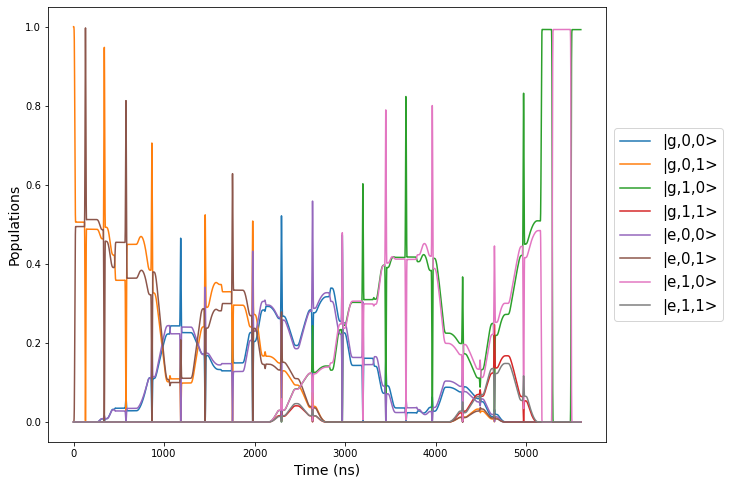

In [56]:
plot_populations(output, 'g00 to g01_eta1Hz.png')